In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import pylab as plt
import glob
import os
import shutil
from pprint import pprint

In [4]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath
import icewave.gps.gps as gps
import icewave.gps.garmin as garmin

Please install garmin package


In [5]:
date = '2024_0210'
year,day = date.split('_')

base = '/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/'
folder = base+'Data/'+year+'/'+day+'/GPS/'
norme_folder = base + 'Nomenclature/'

base = '/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/'
date = '2024_0210'
datesave=date.replace('_','/')
savefolder = base + datesave + '/GPS/' 

filelist = glob.glob(folder+'*.gpx')
print(filelist)
filegpx = filelist[0]

import gpxpy

gpx_file = open(filegpx, 'r')
gpx = gpxpy.parse(gpx_file)
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            print('Point at ({0},{1}) -> {2}'.format(point.latitude, point.longitude, point.elevation))

for waypoint in gpx.waypoints:
    print('waypoint {0}, {1} -> ({2},{3})'.format(waypoint.name, waypoint.time.ctime(), waypoint.latitude, waypoint.longitude))

['/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0210/GPS/1000_Waypoints_2024-02-10.gpx']
waypoint Sag240063, Sat Feb 10 12:21:46 2024 -> (48.365506,-70.697383)
waypoint Sag240064, Sat Feb 10 12:24:56 2024 -> (48.365348,-70.697489)
waypoint Sag240065, Sat Feb 10 12:37:50 2024 -> (48.36539,-70.698094)
waypoint Sag240066, Sat Feb 10 12:39:47 2024 -> (48.36495,-70.697566)
waypoint Sag240067, Sat Feb 10 12:51:18 2024 -> (48.364993,-70.698164)
waypoint Sag240068, Sat Feb 10 13:19:59 2024 -> (48.36515,-70.697859)
waypoint Sag240069, Sat Feb 10 13:20:52 2024 -> (48.365353,-70.697836)
waypoint Sag240070, Sat Feb 10 13:43:33 2024 -> (48.364957,-70.698155)
waypoint Sag240071, Sat Feb 10 13:44:48 2024 -> (48.364828,-70.698183)
waypoint Sag240072, Sat Feb 10 13:50:16 2024 -> (48.36455,-70.697629)
waypoint Sag240073, Sat Feb 10 13:52:57 2024 -> (48.364574,-70.698225)
waypoint Sag240074, Sat Feb 10 13:58:07 2024 -> (48.364601,-70.698833)
waypoint Sag240075, Sat Feb 10 14:44

In [6]:
np.asarray(gpx.waypoints)

array([GPXWaypoint(48.365506, -70.697383, elevation=1.292548, time=datetime.datetime(2024, 2, 10, 12, 21, 46, tzinfo=SimpleTZ("Z")), name='Sag240063', symbol='Flag, Blue'),
       GPXWaypoint(48.365348, -70.697489, elevation=-0.726122, time=datetime.datetime(2024, 2, 10, 12, 24, 56, tzinfo=SimpleTZ("Z")), name='Sag240064', symbol='Flag, Blue'),
       GPXWaypoint(48.36539, -70.698094, elevation=-3.277668, time=datetime.datetime(2024, 2, 10, 12, 37, 50, tzinfo=SimpleTZ("Z")), name='Sag240065', symbol='Flag, Blue'),
       GPXWaypoint(48.36495, -70.697566, elevation=-2.262091, time=datetime.datetime(2024, 2, 10, 12, 39, 47, tzinfo=SimpleTZ("Z")), name='Sag240066', symbol='Flag, Blue'),
       GPXWaypoint(48.364993, -70.698164, elevation=-0.120113, time=datetime.datetime(2024, 2, 10, 12, 51, 18, tzinfo=SimpleTZ("Z")), name='Sag240067', symbol='Flag, Blue'),
       GPXWaypoint(48.36515, -70.697859, elevation=-0.295349, time=datetime.datetime(2024, 2, 10, 13, 19, 59, tzinfo=SimpleTZ("Z")), 

In [16]:
def represent_waypoints(gpx,imin,imax,table=None):
    if table is None:
        table = read_table()
        
    indices = select(gpx,imin,imax)
    Long,Lat = [],[]
    waypoints = np.asarray(gpx.waypoints)[indices]
    for waypoint in waypoints:
        Long.append(waypoint.longitude)
        Lat.append(waypoint.latitude)

    BBox = gps.box_data(Long,Lat,scale=0.7)
    ext = gps.extent(BBox)
    t = gps.tmp_connect()
    fig, ax = plt.subplots(figsize=(10, 10), dpi=200)
    ax,figs = gps.display_map(ext,t,title=date,ax=ax,width=600)

    X,Y = [],[]
    for waypoint in waypoints:
        number = int(waypoint.name[-3:])
        x,y = gps.project(waypoint.longitude,waypoint.latitude)
        X.append(x)
        Y.append(y)
        display(x,y,ax=ax,name=waypoint.name,table=table)
    return ax,figs

def represent_table(table,gpx,imin,imax):
    indices = select(gpx,imin,imax)
    Long,Lat = [],[]
    waypoints = np.asarray(gpx.waypoints)[indices]
    for waypoint in waypoints:
        Long.append(waypoint.longitude)
        Lat.append(waypoint.latitude)

    BBox = gps.box_data(Long,Lat,scale=0.7)
    ext = gps.extent(BBox)
    t = gps.tmp_connect()
    fig, ax = plt.subplots(figsize=(10, 10), dpi=200)
    ax,figs = gps.display_map(ext,t,title=date,ax=ax,width=600)

    X,Y = [],[]
    numbers = np.asarray([int(waypoint.name[-3:]) for waypoint in gpx.waypoints])
    for (number,elem) in table:
        if number in numbers:
            ind = np.where(np.asarray(numbers)==number)[0][0]
            waypoint = gpx.waypoints[ind]
            x,y = gps.project(waypoint.longitude,waypoint.latitude)
            X.append(x)
            Y.append(y)
            name = elem
            if '_' in elem:
                tag,num = elem.split('_')
                label = norme[tag]
            else:
                label = norme[elem]
            ax.plot(x,y,label)
            
            name = name.replace('_','_{')
            name = '$'+name+'}$'
            plt.text(x,y-10**(-7),name)
    return ax,figs
    
def display(x,y,ax=None,name='',table=None):
    if table==None:
        label = 'bo'
    else:
        number = int(name[-3:])
        numbers = [tab[0] for tab in table]
        if number in numbers:
            ind = np.where(np.asarray(numbers)==number)[0][0]
            key,elem = table[ind]
            if '_' in elem:
                name = elem
                tag,num = elem.split('_')
                label = norme[tag]
            else:
                label = norme[elem]
            #print(number,table[number],label)
        elif number>max(numbers):
            label='bo'
        else:
            label='bo'
        ax.plot(x,y,label)
        
    name = name.replace('_','_{')
    name = '$'+name+'}$'
    plt.text(x,y-10**(-7),name)
    

def select(gpx,imin,imax):
    indices = []
    for i,waypoint in enumerate(gpx.waypoints):
        number = int(waypoint.name[-3:])
        #print(number)
        if number>=imin and number<=imax:#True:#int(waypoint.name)>155 and int(waypoint.name)<250:
            indices.append(i)
    return indices

def read_table():
    print(glob.glob(folder+'*.txt'))
    filename = glob.glob(folder+'*.txt')[0]
    with open(filename,'r') as f:
        out = f.read()
    
    lines = out.split('\n')
    table = [line.split('\t') for line in lines]
    dtable = [(int(tab[0]),tab[1]) for tab in table]
    return dtable

def read_norme(folder):
    print(glob.glob(folder+'*.txt'))
    filename = glob.glob(folder+'*.txt')[0]
    
    with open(filename,'r') as f:
        out = f.read()
    
    lines = out.split('\n')
    table = np.asarray([line.split('\t') for line in lines])

    dtable = {tab[0]:tab[1] for tab in table}
    pprint(dtable)
    return dtable

In [17]:
global norme
norme = read_norme(norme_folder)
table = read_table()

['/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Nomenclature/Nomenclature_GPS.txt']
{'B': 'mo',
 'Canot': 'yo',
 'D': 'kp',
 'G': 'g^',
 'H': 'bv',
 'R': 'bs',
 'S': 'bo',
 'T': 'rs',
 'Tomo': 'g>',
 'borne': 'ks',
 'depart': 'g*',
 'fin': 'g*',
 'name': 'label',
 'plot': 'rp'}
['/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0210/GPS/Map_Table.txt']


In [18]:
print(table)
print(norme)

[(63, 'depart'), (64, 'plot_01'), (64, 'Tomo_01'), (65, 'plot_03'), (66, 'plot_02'), (67, 'plot_04'), (68, 'borne_00'), (68, 'B_05'), (69, 'B_02'), (69, 'T_12'), (72, 'Tomo_04'), (72, 'plot_06'), (73, 'plot_05'), (74, 'Tomo_16'), (74, 'plot_07'), (75, 'borne_01'), (75, 'S_500'), (76, 'S_501'), (77, 'S_502'), (78, 'S_503'), (79, 'S_504'), (80, 'S_505'), (81, 'S_506'), (82, 'S_507'), (83, 'S_508'), (84, 'S_509'), (85, 'S_510'), (86, 'S_511'), (87, 'S_512'), (88, 'S_513'), (89, 'S_514'), (90, 'S_515'), (91, 'H_01'), (92, 'R_01'), (92, 'H_02'), (93, 'H_03'), (94, 'H_04'), (94, 'Tomo_02'), (95, 'H_05'), (96, 'H_06'), (96, 'Tomo_07'), (97, 'H_07'), (98, 'H_08'), (98, 'Tomo_11'), (99, 'H_10'), (99, 'H_11'), (99, 'H_12'), (99, 'H_13'), (99, 'H_14'), (99, 'H_15'), (99, 'Tomo_10'), (100, 'H_20'), (100, 'Tomo_09'), (101, 'H_21')]
{'name': 'label', 'depart': 'g*', 'fin': 'g*', 'G': 'g^', 'B': 'mo', 'T': 'rs', 'D': 'kp', 'H': 'bv', 'S': 'bo', 'Tomo': 'g>', 'borne': 'ks', 'plot': 'rp', 'R': 'bs', 'C

['/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0210/GPS/Map_Table.txt']
Extent((0.30361288388888896,0.34608962474026284)->(0.30362135777777777,0.34609809862915164) projected as normal)


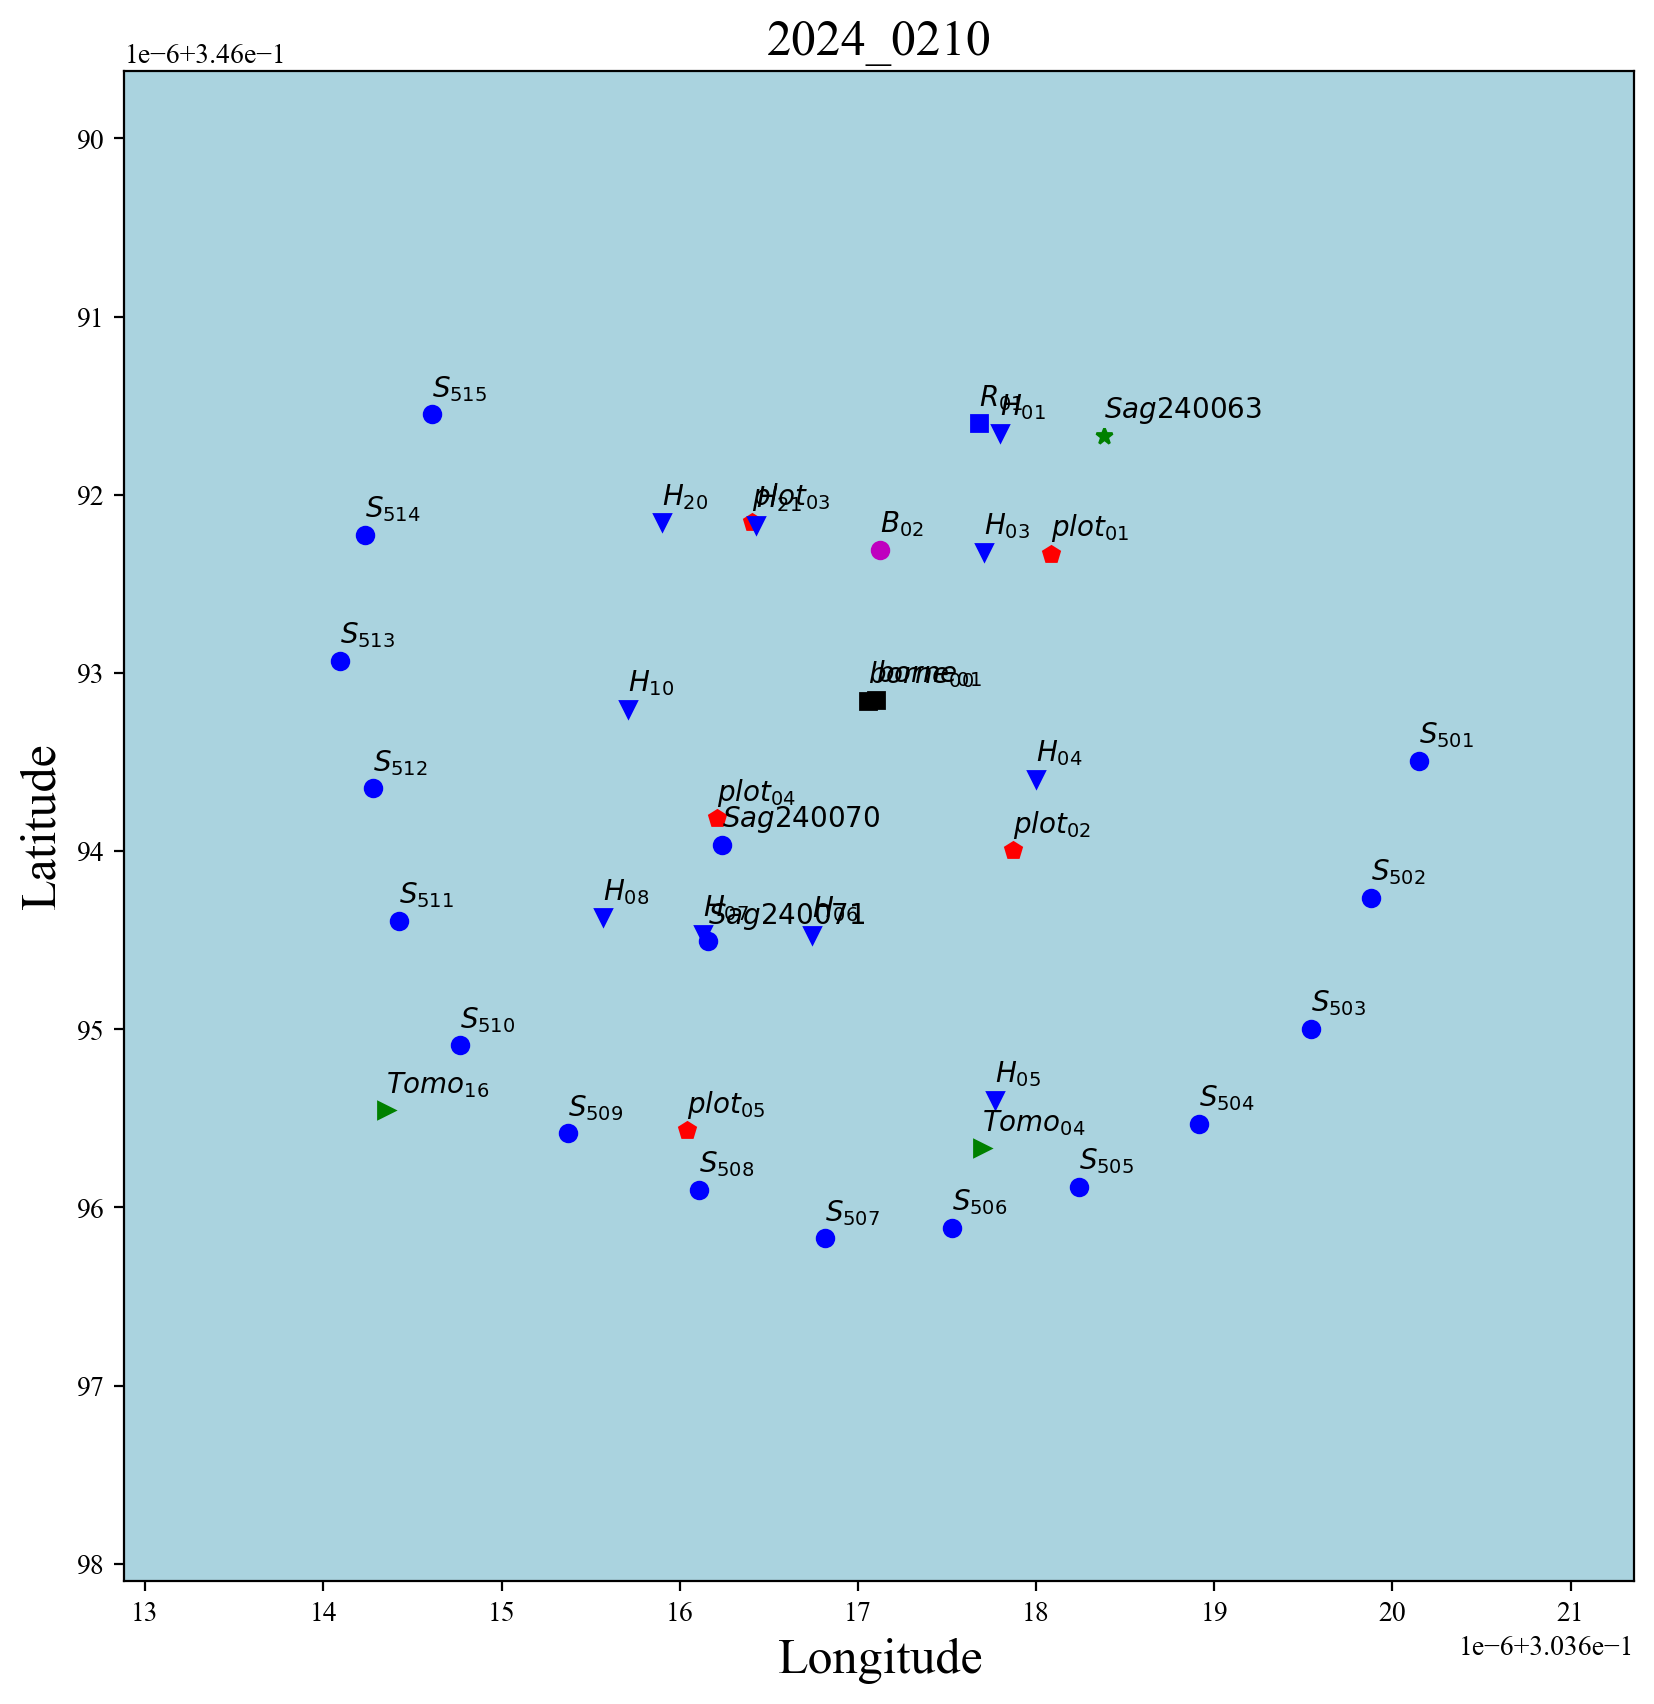

In [19]:
ax,figs = represent_waypoints(gpx,63,101)
graphes.save_figs(figs,savedir=savefolder,prefix='Carte_Generale',suffix='labeled',frmt='pdf',overwrite=True)

Extent((0.30361288388888896,0.34608962474026284)->(0.30362135777777777,0.34609809862915164) projected as normal)
/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0210/Geometry/Geom_table.txt


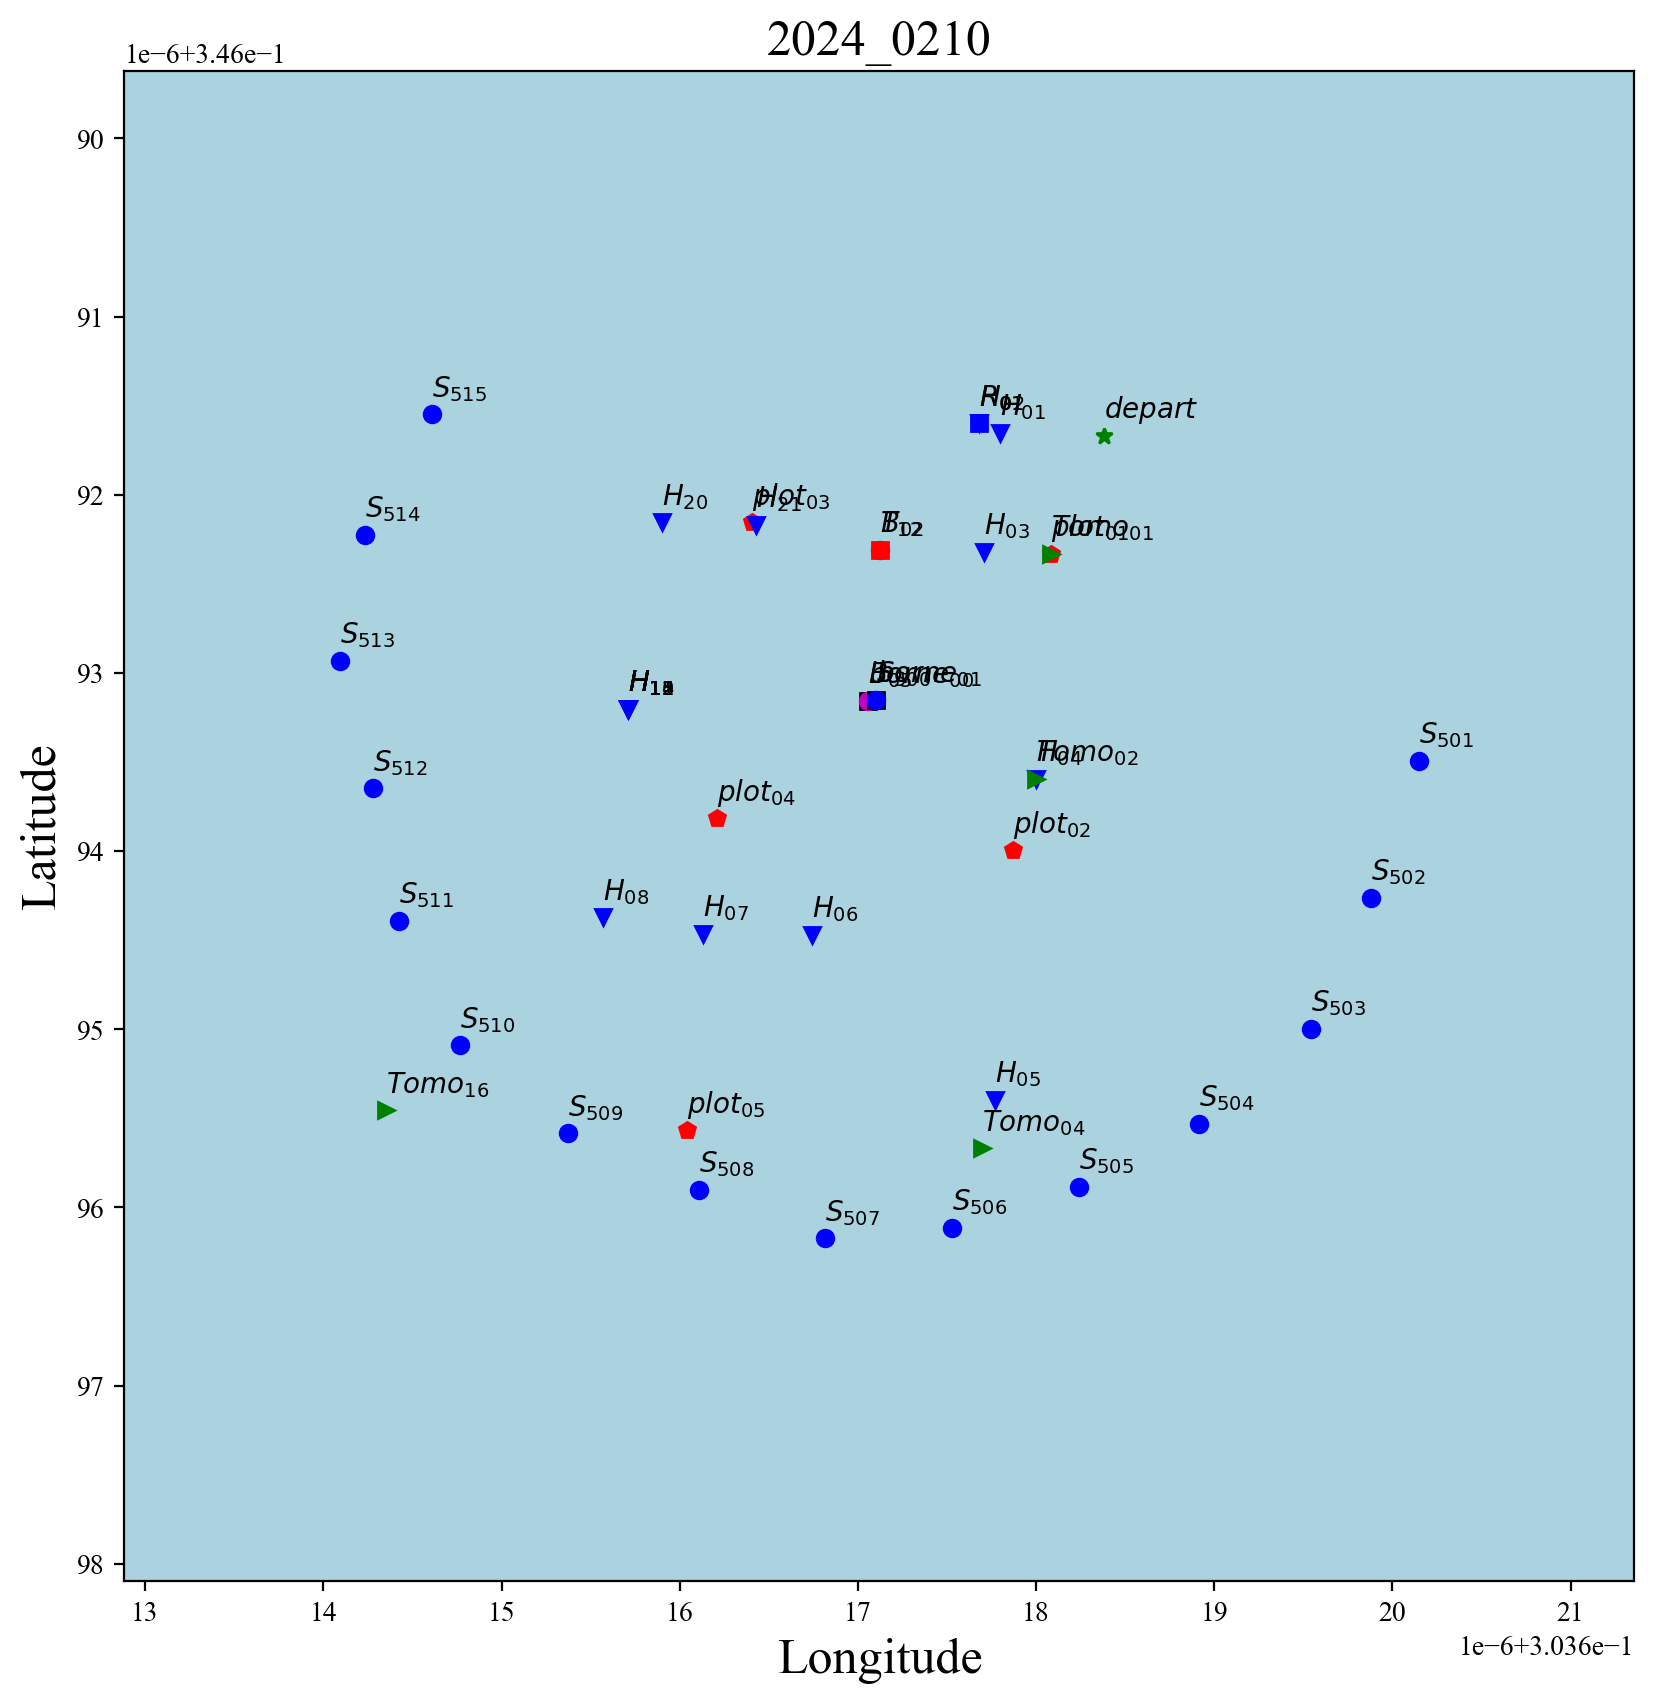

In [285]:
ax,figs = represent_table(table,gpx,63,101)
graphes.save_figs(figs,savedir=savefolder,prefix='Carte_Globale',suffix='labeled',frmt='pdf',overwrite=True)

In [261]:
gpx.waypoints[0]

GPXWaypoint(48.365506, -70.697383, elevation=1.292548, time=datetime.datetime(2024, 2, 10, 12, 21, 46, tzinfo=SimpleTZ("Z")), name='Sag240063', symbol='Flag, Blue')

[autoreload of icewave.geometry.define failed: Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 376, in superreload
    module = reload(module)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in sourc

[['#', 'X', 'Y', 'Z'], ['G_101', 0, 0, 0], ['G_102', 3, 0, 0], ['G_103', 6, 0, 0], ['G_104', 9, 0, 0], ['G_105', 12, 0, 0], ['G_106', 15, 0, 0], ['G_107', 18, 0, 0], ['G_108', 21, 0, 0], ['G_109', 24, 0, 0], ['G_110', 27, 0, 0], ['G_111', 30, 0, 0], ['G_112', 33, 0, 0], ['G_113', 36, 0, 0], ['G_114', 39, 0, 0], ['G_115', 42, 0, 0], ['G_116', 45, 0, 0], ['S_101', -5, 0, 0], ['S_102', -8, 0, 0], ['S_103', -11, 0, 0], ['S_104', 50, 0, 0], ['S_105', 53, 0, 0], ['S_106', 56, 0, 0]]
[['#', 'X', 'Y', 'Z'], ['G_201', 0, 0, 0], ['G_202', 0, -3, 0], ['G_203', 0, -6, 0], ['G_204', 0, -9, 0], ['G_205', 0, -12, 0], ['G_206', 0, -15, 0], ['G_207', 0, -18, 0], ['G_208', 0, -21, 0], ['G_209', 0, -24, 0], ['G_210', 0, -27, 0], ['G_211', 0, -30, 0], ['G_212', 0, -33, 0], ['G_213', 0, -36, 0], ['G_214', 0, -39, 0], ['G_215', 0, -42, 0], ['G_216', 0, -45, 0], ['S_201', 0, 5, 0], ['S_202', 0, 8, 0], ['S_203', 0, 11, 0], ['S_204', 0, -50, 0], ['S_205', 0, -53, 0], ['S_206', 0, -56, 0]]
[['#', 'X', 'Y', 'Z']

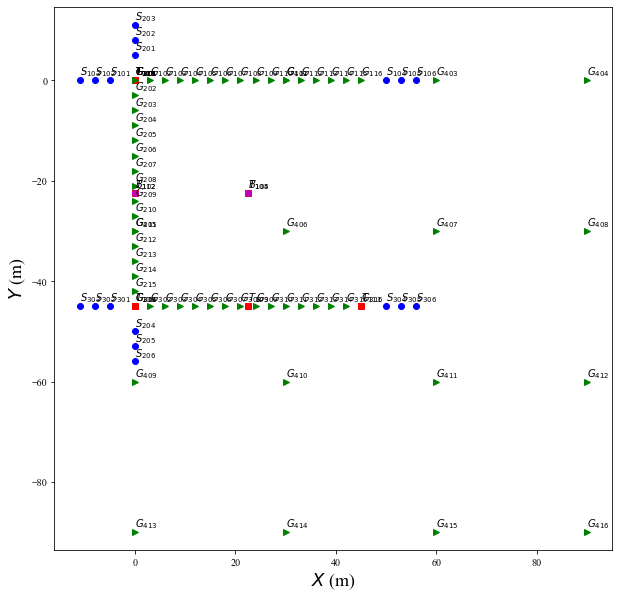

In [295]:
figs,geom = experiments.sag24_0210()
graphes.save_figs(figs,savedir=savefolder,prefix='geometry_'+date,suffix='_general',overwrite=True)
#print(figs)



In [287]:
geom

[['#', 'X', 'Y', 'Z'],
 ['G_01', 0, 0, 0],
 ['G_02', 3, 0, 0],
 ['G_03', 6, 0, 0],
 ['G_04', 9, 0, 0],
 ['G_05', 12, 0, 0],
 ['G_06', 15, 0, 0],
 ['G_07', 18, 0, 0],
 ['G_08', 21, 0, 0],
 ['G_09', 24, 0, 0],
 ['G_10', 27, 0, 0],
 ['G_11', 30, 0, 0],
 ['G_12', 33, 0, 0],
 ['G_13', 36, 0, 0],
 ['G_14', 39, 0, 0],
 ['G_15', 42, 0, 0],
 ['G_16', 45, 0, 0],
 ['S_101', -5, 0, 0],
 ['S_102', -8, 0, 0],
 ['S_103', -11, 0, 0],
 ['S_104', 50, 0, 0],
 ['S_105', 53, 0, 0],
 ['S_106', 56, 0, 0],
 ['G_01', 0, 0, 0],
 ['G_02', 0, -3, 0],
 ['G_03', 0, -6, 0],
 ['G_04', 0, -9, 0],
 ['G_05', 0, -12, 0],
 ['G_06', 0, -15, 0],
 ['G_07', 0, -18, 0],
 ['G_08', 0, -21, 0],
 ['G_09', 0, -24, 0],
 ['G_10', 0, -27, 0],
 ['G_11', 0, -30, 0],
 ['G_12', 0, -33, 0],
 ['G_13', 0, -36, 0],
 ['G_14', 0, -39, 0],
 ['G_15', 0, -42, 0],
 ['G_16', 0, -45, 0],
 ['S_201', 0, 5, 0],
 ['S_202', 0, 8, 0],
 ['S_203', 0, 11, 0],
 ['S_204', 0, -50, 0],
 ['S_205', 0, -53, 0],
 ['S_206', 0, -56, 0],
 ['G_01', 0, -45, 0],
 ['G_02', 

In [293]:
import icewave.geometry.save as geom_save

filename = savefolder + 'Geom_table.txt'

#pprint(geom)

geom_save.save(geom,filename)